In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import batch_normalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

import pickle

import matplotlib.pyplot as plt

In [75]:
data =pd.read_csv("train_data_5.csv")
data.head()

,Unnamed: 0,tweet,offensive,vlg,vio,HS_HS1,HS_HS2,HS_HS3,HS_HS5,HS_HS6,HS_NOT_HS
0,0,مستخدم ردينا ع التطنز وجه مبتسم باستهزاء قبض...,1,0,0,0,0,0,0,0,1
1,1,وصارت فطاير البقالات غذاء صحي ابهام متجه لاسفل 🏻,0,0,0,0,0,0,0,0,1
2,2,مستخدم روحي لبريده تلقين اشباه كثير بس ماحد زي...,1,0,0,0,0,0,0,0,1
3,3,مستخدم مش باين حاجه خالص وجه منصدم مش عارف بق...,0,0,0,0,0,0,0,0,1
4,4,اليوم الاثنين تصفيق يقولك من المسلمين عندهم خ...,0,0,0,0,0,0,0,0,1


In [76]:
len(data)

8556

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data.tweet, data.offensive, test_size=0.12)
X_train.shape,X_test.shape

((7529,), (1027,))

In [98]:
max_length= data.tweet.apply(lambda x: len(str(x).split())).max()
max_length

179

In [99]:
# Using Keras Tokenizer:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
token = Tokenizer()

token.fit_on_texts(list(X_train))

In [100]:
xtrain_seq = token.texts_to_sequences(X_train)
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_length)


In [168]:
X_train[100]

'مستخدم وش قلة الادب هذي  وجه مندهش  وجه بقناع طبي '

In [169]:
xtrain_seq[100]

[257, 2713, 9103, 228, 9104, 109, 5189, 9105, 2714, 1, 444, 4, 5, 6]

In [170]:
xtrain_pad[100]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [102]:
word_index = token.word_index
vocab_size=len(word_index)+1

In [104]:
embeded_vector_size = 128

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 179, 128)          3715456   
                                                                 
 flatten_2 (Flatten)         (None, 22912)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 22913     
                                                                 
Total params: 3,738,369
Trainable params: 3,738,369
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
model.fit(xtrain_pad, y_train, epochs=30)

Epoch 1/30
236/236 [==============================] - 2s 7ms/step - loss: 0.5913 - accuracy: 0.6879
Epoch 2/30
236/236 [==============================] - 1s 5ms/step - loss: 0.3713 - accuracy: 0.8507
Epoch 3/30
236/236 [==============================] - 1s 5ms/step - loss: 0.1515 - accuracy: 0.9576
Epoch 4/30
236/236 [==============================] - 1s 5ms/step - loss: 0.0651 - accuracy: 0.9863
Epoch 5/30
236/236 [==============================] - 1s 5ms/step - loss: 0.0341 - accuracy: 0.9943
Epoch 6/30
236/236 [==============================] - 1s 5ms/step - loss: 0.0210 - accuracy: 0.9968
Epoch 7/30
236/236 [==============================] - 1s 5ms/step - loss: 0.0137 - accuracy: 0.9989
Epoch 8/30
236/236 [==============================] - 1s 5ms/step - loss: 0.0096 - accuracy: 0.9993
Epoch 9/30
236/236 [==============================] - 1s 6ms/step - loss: 0.0079 - accuracy: 0.9991
Epoch 10/30
236/236 [==============================] - 1s 5ms/step - loss: 0.0060 - accuracy: 0.9992

In [107]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

29027

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13)
X_val.shape,X_test.shape

((979,), (1027,))

In [156]:
token = Tokenizer()
token.fit_on_texts(list(X_train) + list(X_val))

In [157]:
word_index = token.word_index
vocab_size=len(word_index)+1

In [115]:
xtrain_seq = token.texts_to_sequences(X_train)
xvalid_seq = token.texts_to_sequences(X_val)
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_length)
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_length)

In [116]:
model = Sequential()
model.add(Embedding(vocab_size,
                     128,
                     weights=[weights],
                     input_length=max_length,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])   
    
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 179, 128)          3715456   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 179, 128)         0         
 lDropout1D)                                                     
                                                                 
 gru_1 (GRU)                 (None, 300)               386100    
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 4,101,857
Trainable params: 386,401
Non-trainable params: 3,715,456
_________________________________________________________________


In [119]:
history=model.fit(xtrain_pad, y_train, validation_data=[xvalid_pad,y_val],epochs = 10)


Epoch 1/10
205/205 [==============================] - 196s 955ms/step - loss: 0.5775 - accuracy: 0.7020 - val_loss: 0.5577 - val_accuracy: 0.7222
Epoch 2/10
205/205 [==============================] - 195s 949ms/step - loss: 0.5725 - accuracy: 0.7099 - val_loss: 0.5628 - val_accuracy: 0.7068
Epoch 3/10
205/205 [==============================] - 196s 955ms/step - loss: 0.5646 - accuracy: 0.7098 - val_loss: 0.5538 - val_accuracy: 0.7120
Epoch 4/10
205/205 [==============================] - 199s 970ms/step - loss: 0.5672 - accuracy: 0.7079 - val_loss: 0.5574 - val_accuracy: 0.7201
Epoch 5/10
205/205 [==============================] - 196s 955ms/step - loss: 0.5573 - accuracy: 0.7185 - val_loss: 0.5764 - val_accuracy: 0.6864
Epoch 6/10
205/205 [==============================] - 194s 945ms/step - loss: 0.5541 - accuracy: 0.7263 - val_loss: 0.5748 - val_accuracy: 0.7007
Epoch 7/10
205/205 [==============================] - 196s 954ms/step - loss: 0.5480 - accuracy: 0.7279 - val_loss: 0.5680 -

In [121]:
model.save('GRU_original_data_offensive')

INFO:tensorflow:Assets written to: GRU_original_data_offensive\assets


INFO:tensorflow:Assets written to: GRU_original_data_offensive\assets


In [122]:
pickle.dump(X_train, open('X_train', 'wb'))
pickle.dump(y_train, open('y_train', 'wb'))

pickle.dump(X_test, open('X_test', 'wb'))
pickle.dump(y_test, open('y_test', 'wb'))

pickle.dump(X_val, open('X_val', 'wb'))
pickle.dump(y_val, open('y_val', 'wb'))

pickle.dump(xtrain_pad, open('xtrain_pad', 'wb'))
pickle.dump(xvalid_pad, open('xvalid_pad', 'wb'))


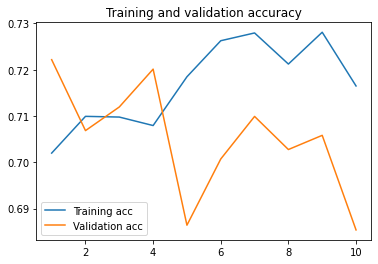

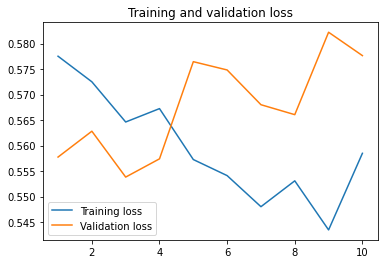

In [123]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [134]:

pred=model.predict(xvalid_pad)

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

In [137]:
pred = np.around(pred)
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_val, pred)

print(cf_matrix)

[[494 146]
 [162 177]]


<AxesSubplot:>

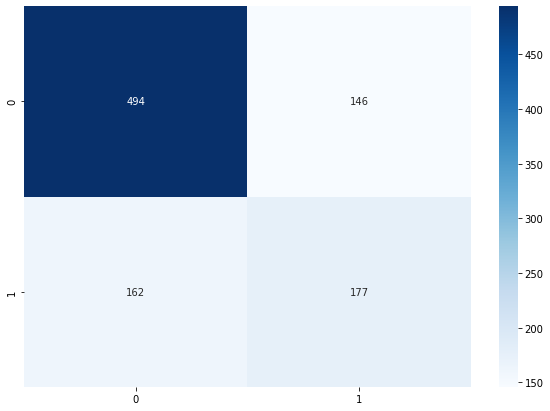

In [139]:
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [140]:
target_names = ['off', 'not']
print(classification_report(y_val,  pred,target_names=target_names))

              precision    recall  f1-score   support

         off       0.75      0.77      0.76       640
         not       0.55      0.52      0.53       339

    accuracy                           0.69       979
   macro avg       0.65      0.65      0.65       979
weighted avg       0.68      0.69      0.68       979



In [141]:
xtest_seq = token.texts_to_sequences(X_test)
xtest_pad = pad_sequences(xtest_seq, maxlen=max_length)


In [143]:
model.evaluate(xtest_pad,y_test)

33/33 [==============================] - 6s 192ms/step - loss: 0.5913 - accuracy: 0.7050


[0.5912976861000061, 0.7049659490585327]

In [142]:
y_pred=model.predict(xtest_pad)

In [144]:
y_pred = np.around(y_pred)
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[539 123]
 [180 185]]


<AxesSubplot:>

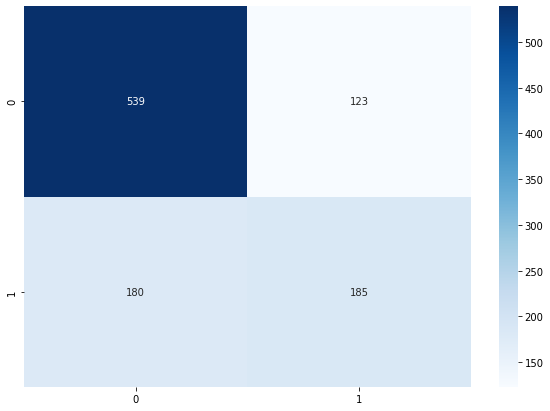

In [145]:
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [146]:
target_names = ['off', 'not']
print(classification_report(y_val,  pred,target_names=target_names))

              precision    recall  f1-score   support

         off       0.75      0.77      0.76       640
         not       0.55      0.52      0.53       339

    accuracy                           0.69       979
   macro avg       0.65      0.65      0.65       979
weighted avg       0.68      0.69      0.68       979

